![example](images/director_shot.jpeg)

# Determining Optimal Attributes for a Movie Release

**Authors:** Cameron T Ladd, Ji Hoon Chung
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

1. What is the most profitable kind of movie by genre?
2. What is the optimal runtime of each movie per genre?
3. What season is the best time to release per genre?

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [111]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [7]:
# Here you run your code to explore the data
!ls data/zippedData

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


## IMPORT ALL DATA

In [8]:
#Box Office Mojo Data (bom)
bom_moviegross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

#IMDB Data (imdb)
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')

#The Numbers (tn)
tn_movie_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

## Preview DataFrames

In [9]:
# bom_moviegross_df.head()

In [12]:
# imdb_title_basics_df.head()

In [19]:
# tn_movie_budgets_df.head()

## Check for missing values

In [20]:
# bom_moviegross_df.isna().sum()

In [23]:
# imdb_title_basics_df.isna().sum()

In [26]:
# tn_movie_budgets_df.isna().sum()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Box Office Mojo Data

In [168]:
# bom_moviegross_df.info()

In [169]:
# bom_moviegross_df['foreign_gross'].describe()

In [170]:
# bom_moviegross_df.isna().sum()

In [171]:
# bom_moviegross_df['foreign_gross'].shape

Let's find the percentage of data that is null!

In [32]:
num_missing_bom_foreigngross = bom_moviegross_df.isna().sum()['foreign_gross']
total_moviegross_entries = len(bom_moviegross_df['foreign_gross'])
percentage_missing_foreign = num_missing_bom_foreigngross / total_moviegross_entries
print(percentage_missing_foreign)

0.3985828166519043


Hmmmmm, so 40% of the data for the 'foreign_gross' column is missing and classified as a NaN. 

Let's dig a little deeper.

In [33]:
len(list(bom_moviegross_df['foreign_gross'].unique()))

1205

There are 1205 unique values in this series. What type of data are they?

In [34]:
non_standard = []
for x in list(bom_moviegross_df['foreign_gross'].unique()):
    if type(x) != int and type(x) != float:
        non_standard.append(x)
    else:
        pass

In [35]:
len(non_standard)

1204

In [36]:
[type(x) for x in non_standard if type(x) != str] #All the unique values are strings

[]

Let's summarize what we have so far:
    
    3387 total entries
    1350 null values
    1204 str type values

This leaves:
    
    833 int/float type values

Let's convert every item in this series to float in order to remove the 'str' types

In [37]:
foreign_gross_numeric = pd.to_numeric(bom_moviegross_df['foreign_gross'], errors = 'coerce', downcast = 'float') #Converted from str, int, float to float

In [38]:
# foreign_gross_numeric.describe()

In [39]:
bom_moviegross_df['foreign_gross'] = foreign_gross_numeric #Assigned new series in place of original df series

In [40]:
# bom_moviegross_df.isna().sum()

In [41]:
# bom_moviegross_df['foreign_gross'].describe()

In [42]:
mean_adjusted = bom_moviegross_df['foreign_gross'].fillna(75057048)

In [43]:
# mean_adjusted.describe()

In [44]:
mean_adjusted_removed = bom_moviegross_df[(bom_moviegross_df['foreign_gross'] > 1000000) & (bom_moviegross_df['domestic_gross'] > 1000000)]

In [45]:
# mean_adjusted_removed.shape

In [46]:
# mean_adjusted_removed.isna().sum()

Let's just remove everything that doesn't have a domestic gross value

In [47]:
mean_adjusted_removed.dropna(axis=0, how='any', inplace=True)

<ipython-input-47-d442058cf311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_adjusted_removed.dropna(axis=0, how='any', inplace=True)


In [48]:
# mean_adjusted_removed

In [110]:
# mean_adjusted_removed.isna().sum()

Let's drop the columns that I will not be using

In [50]:
mean_adjusted_removed.drop('year', axis=1, inplace=True)

C:\Users\camla\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
mean_adjusted_removed.drop('studio', axis=1, inplace=True)

In [52]:
# mean_adjusted_removed

In [53]:
final_moviegross_df = mean_adjusted_removed.set_index('title')

In [54]:
final_moviegross_df['total_gross'] = final_moviegross_df['domestic_gross'] + final_moviegross_df['foreign_gross']

In [55]:
# final_moviegross_df

## IMDB Title_basics data

Let's clean the imdb_title_basics_df

In [56]:
# imdb_title_basics_df

In [57]:
imdb_title_index = imdb_title_basics_df.set_index('primary_title')

In [58]:
# imdb_title_index

In [59]:
imdb_title_basics_df.shape

(146144, 6)

In [60]:
imdb_title_index_dropped = imdb_title_index.drop('tconst', axis=1)

In [61]:
# imdb_title_index_dropped

In [62]:
imdb_title_index_removedna = imdb_title_index_dropped.dropna(axis=0, how = 'any')

In [63]:
# imdb_title_index_removedna

In [64]:
dropped_imdb_title = imdb_title_index_removedna.drop(['original_title', 'start_year'], axis=1)

In [65]:
# dropped_imdb_title

In [66]:
final_imdb_title_df = dropped_imdb_title

In [67]:
# final_imdb_title_df

Here are the two DataFrames we have so far:

In [68]:
# final_imdb_title_df

In [69]:
# final_moviegross_df

## tn_movie_budgets_df

In [70]:
# tn_movie_budgets_df

In [71]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].map(lambda x: x.lstrip('$'))

In [72]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].map(lambda x: x.lstrip('$'))

In [73]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].map(lambda x: x.lstrip('$'))

In [74]:
tn_movie_budgets_df.loc[:, "production_budget":"worldwide_gross"] = tn_movie_budgets_df.loc[:, "production_budget":"worldwide_gross"].replace(",","", regex=True).astype('int64')

In [75]:
tn_movie_budgets_df.rename(columns = {'movie':"primary_title"}, inplace = True)
# tn_movie_budgets_df.head()

In [76]:
final_imdb_title_df.rename(columns = {'primary_title':"title"}, inplace = True)
# final_imdb_title_df.head()

## Merging the data

In [77]:
final_df = tn_movie_budgets_df.merge(final_imdb_title_df, on= 'primary_title', how= 'inner')
# final_df.head()

In [78]:
final_df["total_gross"] = final_df["domestic_gross"] + final_df["worldwide_gross"]
# final_df

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

comment on my code

## Total gross per genre

In [79]:
count = final_df['genres'].str.split(',', expand=True).stack().value_counts()

In [80]:
genres = final_df.copy()

In [81]:
#Find the total frequency of each genre
genres[['genre1', 'genre2', 'genre3']] = final_df['genres'].str.split(',', expand=True)
genres['profit'] = genres['total_gross'] - genres['production_budget']
# genres

Now, I need to group the genres and add the total_gross for each genre entry

In [82]:
genre1_total_gross = genres.groupby('genre1')['total_gross'].sum()

In [83]:
genre2_total_gross = genres.groupby('genre2')['total_gross'].sum()

In [84]:
genre3_total_gross = genres.groupby('genre3')['total_gross'].sum()

Now I have to add all of these genre total together with each other, genre specific. I will use the .add() method because it allows for me to add all genres at the same time, while also dealing with any missing values!

In [85]:
genre_total_gross = genre1_total_gross.add(genre2_total_gross, fill_value=0).add(genre3_total_gross, fill_value=0)

In [86]:
#Drop the 'News' and 'Reality TV' rows because they have minimal observations
final_genre_total_gross = genre_total_gross.drop(['News', 'Reality-TV'])

In [87]:
# final_genre_total_gross

Same process as above, just with worldwide_gross and domestic_gross series

In [88]:
genre1_worldwide_gross = genres.groupby('genre1')['worldwide_gross'].sum()

In [89]:
genre2_worldwide_gross = genres.groupby('genre2')['worldwide_gross'].sum()

In [90]:
genre3_worldwide_gross = genres.groupby('genre3')['worldwide_gross'].sum()

In [91]:
genre_total_worldwide_gross = genre1_worldwide_gross.add(genre2_worldwide_gross, fill_value=0).add(genre3_worldwide_gross, fill_value=0)

In [92]:
final_genre_worldwide_gross = genre_total_worldwide_gross.drop(['News', 'Reality-TV'])

In [93]:
# final_genre_worldwide_gross

In [94]:
genre1_domestic_gross = genres.groupby('genre1')['domestic_gross'].sum()

In [95]:
genre2_domestic_gross = genres.groupby('genre2')['domestic_gross'].sum()

In [96]:
genre3_domestic_gross = genres.groupby('genre3')['domestic_gross'].sum()

In [97]:
genre_total_domestic_gross = genre1_domestic_gross.add(genre2_domestic_gross, fill_value=0).add(genre3_domestic_gross, fill_value=0)

In [98]:
final_genre_total_domestic_growth = genre_total_domestic_gross.drop(['News', 'Reality-TV'])

In [99]:
# final_genre_total_domestic_growth

In [100]:
final_gross_df = pd.concat([final_genre_total_domestic_growth, final_genre_worldwide_gross, final_genre_total_gross], axis=1).reset_index()

In [101]:
final_gross_df_cleaned = final_gross_df.set_index('index')

Now I will make a stacked bar graph!!! Each genre's bar will be split by "domestic_gross" and "foreign_gross", equaling the total bar, which is total_gross

In [102]:
bar_plotdata = final_gross_df_cleaned.drop('total_gross', axis=1)

In [103]:
# bar_plotdata

Text(0, 0.5, 'Gross (in 10s of billions of dollars)')

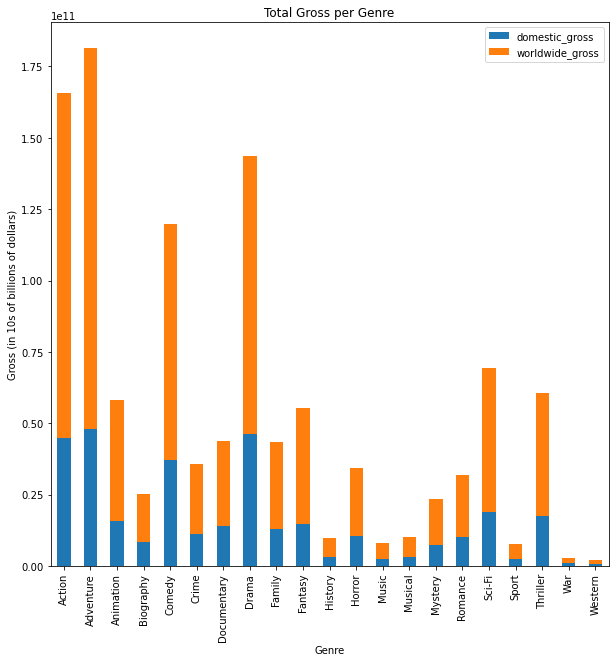

In [104]:
bar_plotdata.plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Total Gross per Genre')
plt.xlabel('Genre')
plt.ylabel('Gross (in 10s of billions of dollars)')

## Total profit per genre

In [105]:
genre1_total_profit = genres.groupby('genre1')['profit'].sum()
genre2_total_profit = genres.groupby('genre2')['profit'].sum()
genre3_total_profit = genres.groupby('genre3')['profit'].sum()
genre_overall_profit = genre1_total_profit.add(genre2_total_profit, fill_value=0).add(genre3_total_profit, fill_value=0)

In [106]:
final_genre_profit_df = genre_overall_profit.drop(['News', 'Reality-TV'])

In [109]:
# final_genre_profit_df

Text(0, 0.5, 'Profit (in 10s of billions of dollars)')

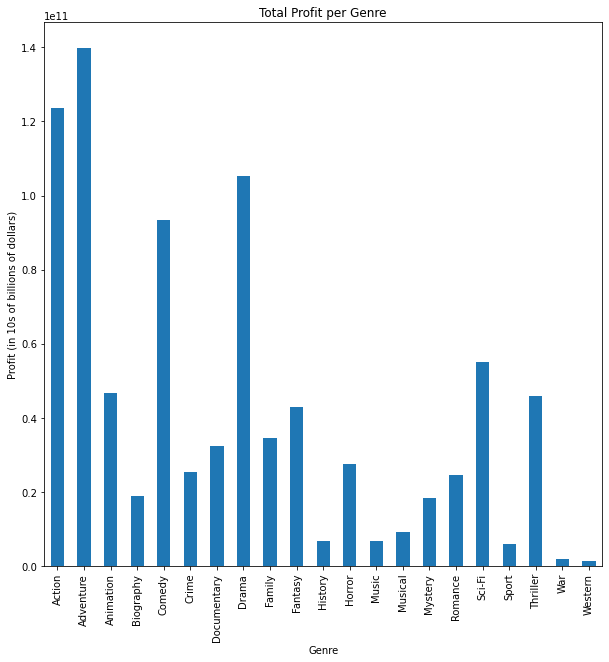

In [108]:
final_genre_profit_df.plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Total Profit per Genre')
plt.xlabel('Genre')
plt.ylabel('Profit (in 10s of billions of dollars)')

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***